## About Dataset

The data was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here belong to the Pima Indian heritage (subgroup of Native Americans), and are females of ages 21 and above.

We’ll be using Python and some of its popular data science related packages. First of all, we will import pandas to read our data from a CSV file and manipulate it for further use. We will also use numpy to convert out data into a format suitable to feed our classification model. We’ll use seaborn and matplotlib for visualizations. We will then import Logistic Regression algorithm from sklearn. This algorithm will help us build our classification model.

### Link: https://www.kaggle.com/datasets/kandij/diabetes-dataset?datasetId=185987

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = 'darkgrid')


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [2]:
# Data reading
df = pd.read_csv('diabetes2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [3]:
# Number of rows 
df.shape[0]

768

In [4]:
# Data types dont't need any changes
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
# No missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

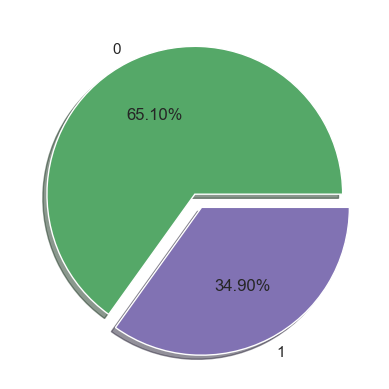

In [6]:
# Target categories count
df.Outcome.value_counts().plot.pie(autopct='%1.2f%%', shadow = True, explode = (0,0.1), colors = ['g','m'])
plt.ylabel('')
plt.show()

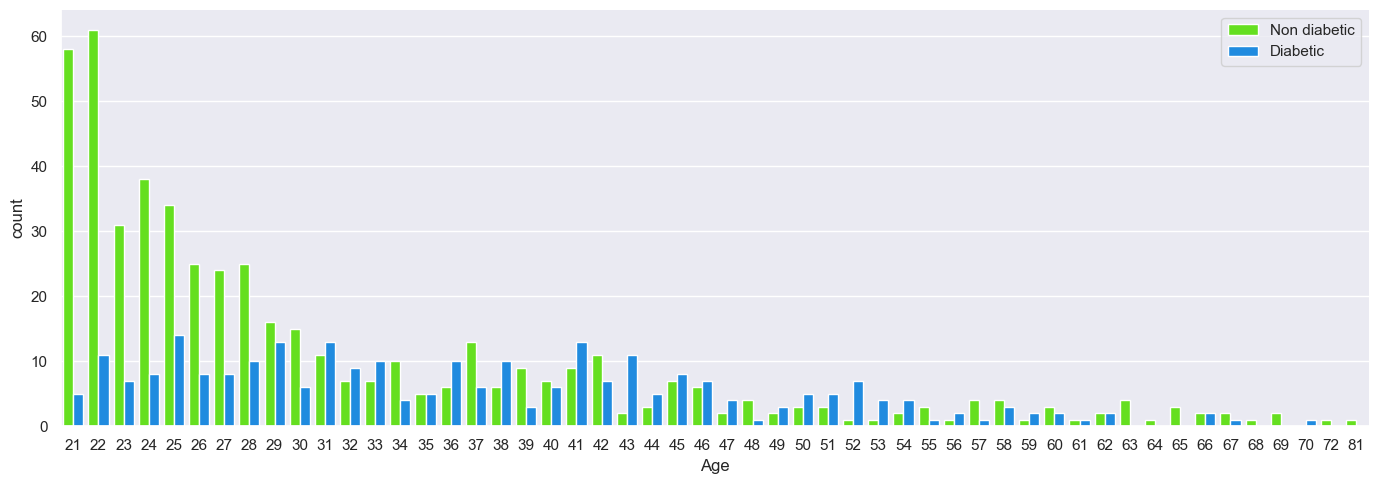

In [7]:
# Age influence to diabets
ax = sns.catplot(data=df, x="Age", kind="count", hue="Outcome", palette="gist_rainbow", legend=False)
ax.fig.set_figwidth(16)
plt.legend(loc='upper right', labels= ["Non diabetic", "Diabetic"])
plt.show()

<AxesSubplot:>

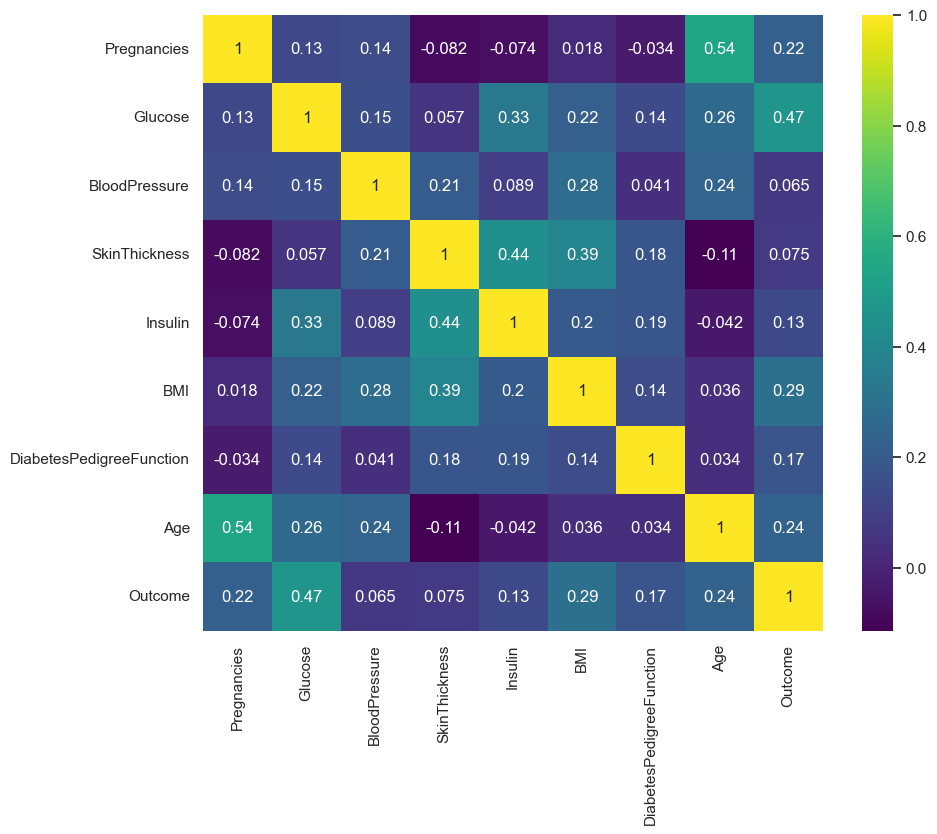

In [8]:
# Correlations heatmap
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

## Making classification models

In [9]:
# Splitting data to features and target

X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [10]:
# Scaling features

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [11]:
# Splitting data to train and test

x_train, x_test, y_train, y_test = train_test_split(Xs,y,
                                                    test_size=0.3,
                                                    random_state=1)


In [12]:
# Using 4 different classifiers to choose the best score

LR = LogisticRegression()
GB = GradientBoostingClassifier()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()

models = [LR, GB, DT, RF]


for model in models:
    model.fit(x_train, y_train)
    print(f'Prediction score: {round(model.score(x_test,LR.predict(x_test)) * 100,2)} % for {model}')
    print('------------------------------------------------------')

Prediction score: 100.0 % for LogisticRegression()
------------------------------------------------------
Prediction score: 90.48 % for GradientBoostingClassifier()
------------------------------------------------------
Prediction score: 80.95 % for DecisionTreeClassifier()
------------------------------------------------------
Prediction score: 92.21 % for RandomForestClassifier()
------------------------------------------------------


## Logistic Regression results

<AxesSubplot:>

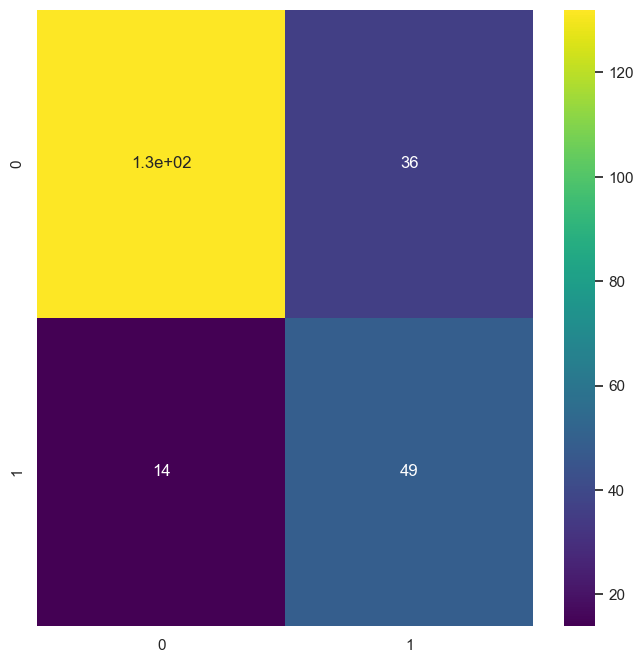

In [13]:
# Confusion matrix for Logistic Regression 

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(LR.predict(x_test),y_test), annot=True, cmap='viridis')

In [14]:
print(f'Accuracy:  {accuracy_score(y_test, LR.predict(x_test)).round(2)}')

Accuracy:  0.78


In [15]:
print(f'Precision: {precision_score(y_test, LR.predict(x_test)).round(2)}')

Precision: 0.78


In [16]:
print(f'Recall: {recall_score(y_test, LR.predict(x_test)).round(2)}')

Recall: 0.58
